# Lab 11: Determining the molar enthalpy of reaction from heat transfer using Hess' Law

In this lab you will calculate the molar enthalpy of various reactions by determining the precise amount of heat transferred. You will be collecting temperature and time data in lab, then will need to fit your data to best fit lines and then use your graphs to extrapolate to the precise temperature obtained upon mixing.  

This python code is set up for Part A of the lab, and will require some modification to be used for the other parts of the lab (e.g. changing the value of the extrapolation data point, changing the placement of the legend on the plot, changing the name of the text files). I recommend that you first use this code for Part A, then make a copy of the code and rename it and modify it for Parts B, C, and D, so that you have a separate version of the code for each part, each reading separate text files containing the data recorded in lab. 

To use this code for Part A, you will need to set up two text files of your data. Existing files are provided, in which you should replace the values with the values you recorded during lab. You will need to separate your data into different files to create the best fit lines for your extrapolation. This python script will read in your time and temperature data from two files: 1. The time and temperature data, with one column for time, one for warm water, and one for room temperature water, before mixing should be listed in 'LAB_11.HessLaw_time_temperature.txt',  2. The time and temperature, one column of time and one of temperature, data from after mixing in 'LAB_11.HessLaw_after_time_temperature.txt'.


First we will import the necessary libraries from python. 

In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

Next we will set up some empty arrays. 

In [3]:
#### HESS' LAW CALCULATIONS AND PLOT
print("\n HESS' LAW CALCULATIONS AND PLOT \n")

# Set up empty arrays that we will populate 
before_time = []  # This is the data before mixing
before_temperature_hot = [] 
before_temperature_cold = [] 
after_time = [] # This is the data after mixing
after_temperature = [] 


 HESS' LAW CALCULATIONS AND PLOT 



Next we will read in the text file of the measured data points collected before mixing the solutions and load the values into our arrays.

In [4]:
# Read in the data from the text file of the measured time and temperature data, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
HessLaw_file = ('LAB_11.HessLaw_time_temperature.txt')  
values = numpy.genfromtxt(fname=HessLaw_file, skip_header=1, delimiter=' ', dtype='unicode')
#print(values)

for i in range(0, len(values)):
    before_time.append(float(values[i,0])); 
    before_temperature_hot.append(float(values[i,1])); 
    before_temperature_cold.append(float(values[i,2])); 

Now we will plot this data. 


Plotting the measured data as points... 



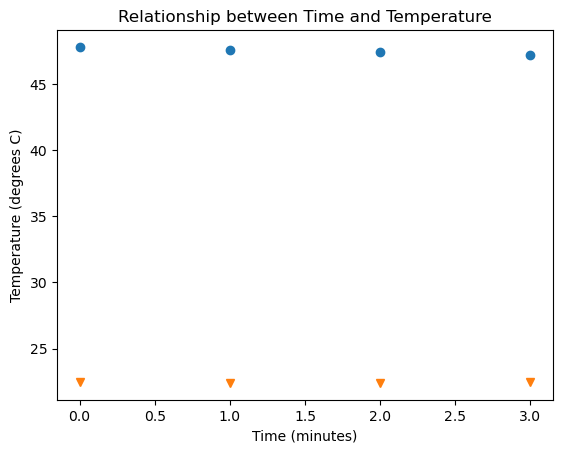

In [5]:
print("\nPlotting the measured data as points... \n")
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
#plt.xticks(numpy.arange(0, 5, 1))
plt.plot(before_time, before_temperature_hot, 'o', label='hot data')
plt.plot(before_time, before_temperature_cold, 'v', label='cold data')

Look at your plot. Does the data make sense? Do you have two series of temperature values for the warm and room temperature/cold baths?  The warm water values should be slightly decreasing and the room temperature values should be very stable. Now read in the data from the file for temperatures collected after mixing the solutions. 

In [6]:
# Read in the data from the text file of the measured time and temperature data, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
HessLaw_after_file = ('LAB_11.HessLaw_after_time_temperature.txt')  
after_values = numpy.genfromtxt(fname=HessLaw_after_file, skip_header=1, delimiter=' ', dtype='unicode')
#print(after_values)

for i in range(0, len(after_values)):
    after_time.append(float(after_values[i,0])); 
    after_temperature.append(float(after_values[i,1])); 

#print(after_time)
#print(after_temperature)

Add this data to the plot. 

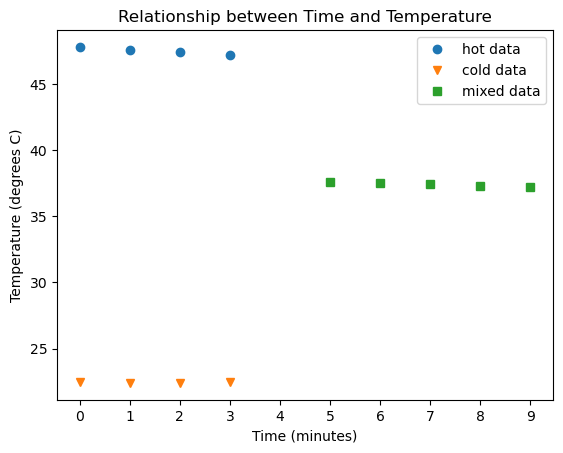

In [7]:
plt.figure()
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")

plt.xticks(numpy.arange(0, 10, 1))
plt.plot(before_time, before_temperature_hot, 'o', label='hot data')
plt.plot(before_time, before_temperature_cold, 'v', label='cold data')
plt.plot(after_time, after_temperature, 's', label='mixed data')
plt.legend()

Look at your plot.  Do the new values make sense? They should be in between the warm and room temperature/cold values that you measured.  If all the data looks good, then you are ready to do the best fit lines and your temperature extrapolation. There will be three linear regression fits: to the warm/hot data, to the room temperature/cold data, and to the data obtained after mixing. 

In [8]:
# Use linear regression to determine the best fit line
hot_fit = stats.linregress(before_time, before_temperature_hot)
print(f"R-squared for hot data: {hot_fit.rvalue**2:.6f}")
print(f"Slope: {hot_fit.slope:.6e}")
hot_R_text = f"R^2 = {hot_fit.rvalue**2:.4f}"
hot_eqn_text = f"y = {hot_fit.slope:.4e} x + {hot_fit.intercept:.2f}"

cold_fit = stats.linregress(before_time, before_temperature_cold)
print(f"R-squared for cold data: {cold_fit.rvalue**2:.6f}")
print(f"Slope: {cold_fit.slope:.6e}")
cold_R_text = f"R^2 = {cold_fit.rvalue**2:.4f}"
cold_eqn_text = f"y = {cold_fit.slope:.4e} x + {cold_fit.intercept:.2f}"

after_fit = stats.linregress(after_time, after_temperature)
print(f"R-squared for after mixing data: {after_fit.rvalue**2:.6f}")
print(f"Slope: {after_fit.slope:.6e}")
after_R_text = f"R^2 = {after_fit.rvalue**2:.4f}"
after_eqn_text = f"y = {after_fit.slope:.4e} x + {after_fit.intercept:.2f}"

R-squared for hot data: 1.000000
Slope: -2.000000e-01
R-squared for cold data: 0.000000
Slope: 0.000000e+00
R-squared for after mixing data: 1.000000
Slope: -1.000000e-01



Think about if your fits make sense. Do you have a negative slope for both the hot and mixed solutions, showing that they are cooling over time? Do you have a nearly zero slope for the room temperature data where the temperature is nearly constant? If they make sense, then we are ready to use the slope and intercept to determine the fit values, then add them to the plot. 



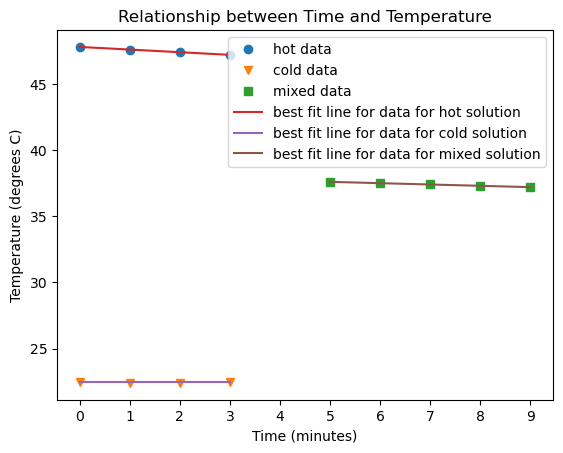

In [9]:
# Plot the fit line
# Use slope and intercept from the fit to determine the fitted values for the plot
fit_before_temp_hot = []
fit_before_temp_cold = []
fit_after_temp = []
for value in before_time:
    fit_before_temp_hot.append(hot_fit.slope * value + hot_fit.intercept)
    fit_before_temp_cold.append(cold_fit.slope * value + cold_fit.intercept)

for value in after_time:
    fit_after_temp.append(after_fit.slope * value + after_fit.intercept)


plt.figure()
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")

plt.xticks(numpy.arange(0, 10, 1))
plt.plot(before_time, before_temperature_hot, 'o', label='hot data')
plt.plot(before_time, before_temperature_cold, 'v', label='cold data')
plt.plot(after_time, after_temperature, 's', label='mixed data')
plt.plot(before_time,fit_before_temp_hot, '-', label='best fit line for data for hot solution')
plt.plot(before_time,fit_before_temp_cold, '-', label='best fit line for data for cold solution')
plt.plot(after_time,fit_after_temp, '-', label='best fit line for data for mixed solution')
plt.legend()

Now you should see your three best fit lines on the graph. If the fits look good, then you are ready to do the extrapolation to the mixing time. In this experiment, the mixing occurs at the 4 minute mark, we therefore want to determine the value for each fit at the four minute time. If we want to include this value in the plot, then we also need to add it to the array (we 'append' the value to the array if we add the value at the end, and we can 'insert' the value at the beginning for the mixing data) and then replot the figure. Note: If you have run the code multiple times and are getting error messages, then try running the notebook again from the beginning, running each cell - there might be an issue with adding to the array multiple times and there being a mismatch in the array sizes. 

In [10]:
# Set the value for the extrapolated time
extrapolated_time_value = 4.0

# Append the value to the end of the array for the before mixing fits

# Here we need a new array since we use the original array to plot the measured temperature data points
ext_before_time = numpy.append(before_time, extrapolated_time_value) 

# Here we can just append to the fit arrays
fit_before_temp_hot.append(hot_fit.slope * extrapolated_time_value + hot_fit.intercept)
fit_before_temp_cold.append(cold_fit.slope * extrapolated_time_value + cold_fit.intercept)

# insert the value to the beginning of the array for the after mixing fits
# the first spot in the array is indexed with a zero
ext_after_time = numpy.insert(after_time, 0, extrapolated_time_value)
fit_after_temp.insert(0, after_fit.slope * extrapolated_time_value + after_fit.intercept)

# Check that the values were added to the arrays correctly

print(ext_before_time)
print (fit_before_temp_hot)
print (fit_before_temp_cold)

print(ext_after_time)
print(fit_after_temp)


[0. 1. 2. 3. 4.]
[47.8, 47.6, 47.4, 47.2, 47.0]
[22.45, 22.45, 22.45, 22.45, 22.45]
[4. 5. 6. 7. 8. 9.]


NameError: name 'fit_after_temperature' is not defined

Check the values printed out in your arrays above.  You should have one new value based on your linear regression fits. Now we can plot the lines with this new data point and add the line equation to the graph. 

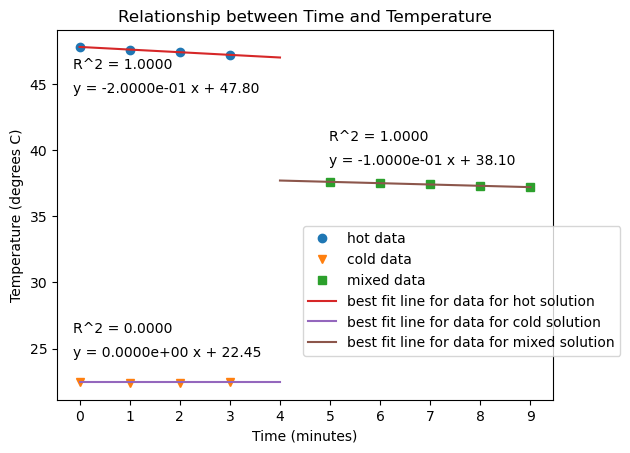

In [11]:
plt.figure()
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")

plt.xticks(numpy.arange(0, 10, 1))
plt.plot(before_time, before_temperature_hot, 'o', label='hot data')
plt.plot(before_time, before_temperature_cold, 'v', label='cold data')
plt.plot(after_time, after_temperature, 's', label='mixed data')
plt.plot(ext_before_time,fit_before_temp_hot, '-', label='best fit line for data for hot solution')
plt.plot(ext_before_time,fit_before_temp_cold, '-', label='best fit line for data for cold solution')
plt.plot(ext_after_time,fit_after_temp, '-', label='best fit line for data for mixed solution')
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.10)) # Use these values to place your legend where you want it
plt.figtext(0.15, 0.75, hot_eqn_text)  # Use these values to place your equations for each fit where you want them
plt.figtext(0.15, 0.8, hot_R_text)
plt.figtext(0.15, 0.2, cold_eqn_text)
plt.figtext(0.15, 0.25, cold_R_text)
plt.figtext(0.55, 0.6, after_eqn_text)
plt.figtext(0.55, 0.65, after_R_text)
#plt.show()
plt.savefig('LAB_11.HessLaw.png')

Analyze your extrapolated plots - do they look good? If so, then you are ready to print out the figure and compute the extrapolated temperature difference from the fit lines.  Here we will use the variable we set previously, 'extrapolated_time_value', which was set to 4 minutes. 

In [12]:
Extrapolated_temp_before_cold = cold_fit.slope * extrapolated_time_value + cold_fit.intercept
Extrapolated_temp_before_hot = hot_fit.slope * extrapolated_time_value + hot_fit.intercept
Extrapolated_temp_after = after_fit.slope * extrapolated_time_value + after_fit.intercept

print(f"Extrapolated temperature value (degrees C) for cold solution at 4 minutes: {Extrapolated_temp_before_cold :.2f}")
print(f"Extrapolated temperature value (degrees C) for hot solution at 4 minutes: {Extrapolated_temp_before_hot :.2f}")
print(f"Extrapolated temperature value (degrees C) after mixing solution at 4 minutes: {Extrapolated_temp_after :.2f}")

Delta_T_cold = Extrapolated_temp_after - Extrapolated_temp_before_cold
Delta_T_hot = Extrapolated_temp_after - Extrapolated_temp_before_hot

print(f"Heat gained value (degrees C) for cold solution: {Delta_T_cold :.2f}")
print(f"Heat lost value (degrees C) for hot solution: {Delta_T_hot :.2f}")

Extrapolated temperature value (degrees C) for cold solution at 4 minutes: 22.45
Extrapolated temperature value (degrees C) for hot solution at 4 minutes: 47.00
Extrapolated temperature value (degrees C) after mixing solution at 4 minutes: 37.70
Heat gained value (degrees C) for cold solution: 15.25
Heat lost value (degrees C) for hot solution: -9.30


Now that you have the Delta T values, feel free to add more code below to perform your calculations for the calorimeter constant. 